# Homework 1: Perceptron Algorithm

Student Name: Kuan-Lin Liu <br>
NetID: kll482

---

## Packages 

In [1]:
#!pip install pandas
#!pip install numpy

In [2]:
import pandas as pd, numpy as np
import time
import matplotlib.pyplot as plt

## Question 1

Tasks: <br>
1. Reading spam_train.txt
2. Splitting into training set (first 4000) and validation set (last 1000)
3. Explaining

In [3]:
data_list = []
my_path = "/home/jovyan/shared/spam_train.txt"
sub_path = "spam_train.txt"
with open(sub_path, "r") as f:
    for line in f:
        data_list.append([line[0], line[2:].strip("\n").split()])
data_list = np.array(data_list)

In [4]:
train = data_list[:4000, :]
validation = data_list[4000:, :]

> The validation set which is sampled from the original training data help us tune the hyperparameters to avoid building a extremely complex model. In other words, if we only train the model on the training set, we may tend to get the best model so far. However, the model could perform really bad on the test set. In summary, without the validation set, we would be more likely to cause overfitting on the model.

---
## Question 2

Tasks: <br>
1. Transforming the text into feature vectors
2. Keeping the word appearing in more than or equal to 30 emails.

> Method 1: Getting the word list and word vector without any libraries

In [15]:
def getWordList(data_list):
    word_hash = {}
    for target, words in data_list:
        # how many email does a word exist?
        unique_words = np.unique(words)
        for i in unique_words:
            if i not in word_hash.keys():
                word_hash[i] = 1
            else:
                word_hash[i] += 1

    # obtain the word list (>30)
    return np.array([k for k, v in word_hash.items() if v >= 30])

# create word list based on the training set
train_word_list = getWordList(train)

In [16]:
def transformToFeatures(word_list, data_list):
    # build a dict of words for search: O(1)
    word_dict = {value: index for index, value in enumerate(word_list)}
    
    # initializing a n*m array (n=# of emails; m=# of words)
    array_of_features = np.zeros((len(data_list), len(word_list)))
    
    # For every words in each email, see if it is in the word_dict by
    index_email = 0
    for target, words in data_list:
        for w in np.unique(words):
            if word_dict.get(w) is not None:
                array_of_features[index_email, word_dict.get(w)] = 1
        index_email += 1
    return array_of_features
                
train_features_vector = transformToFeatures(train_word_list, train)
validation_features_vector = transformToFeatures(train_word_list, validation)

In [17]:
print(train_features_vector.shape)
print(validation_features_vector.shape)

(4000, 2376)
(1000, 2376)


## Question 3

In [41]:
def signFunc(x):
    if x >= 0:
        return 1
    else:
        return -1
    
def perceptron_train(data, max_iter=None, avg_func=False):
    '''
    1. data is a two D array with the target variable in the first column and feature set in the rest
    2. The target variable should be -1 or 1 
    '''
    # initials
    w = np.zeros(data.shape[1]-1)
    error = 1 # for while loop
    batch = 0 # number of iteration
    k = 0 # number of updating
    iteration = 0
    sum_w = np.zeros(data.shape[1]-1) # for counting the final average of weights
    while error != 0:
        error = 0
        batch += 1
        for i in range(data.shape[0]):
            x = data[i, 1:]
            y = data[i, 0] # a number; not an array
            if signFunc(np.dot(w, x)) != y:
                error += 1
                w += y*x
            iteration += 1
            sum_w += w
        k += error
        
        if batch == max_iter:
            break
    
    # Return 
    if avg_func:
        return sum_w/iteration, k, batch
    else:
        return w, k, batch

def perceptron_test(w, data):
    # initializing
    x = data[:, 1:]
    y = np.array(data[:, 0])
    
    pred_value = np.dot(x, w)
    sign_vectorizer = np.vectorize(signFunc)
    sign_pred_value = sign_vectorizer(pred_value)
    
    return 1-(sum(sign_pred_value==y)/len(y)) # 1-number of right prediction

## Question 4

> Combining the target variable and the feature sets into a new array for both training and validation set.

In [19]:
# Merge the target variable and the feature vectors into a DataFrame
y_train = np.array([[-1 if x==0 else 1 for x in train[:, 0].astype(int)]]) # 2D
train_array = np.concatenate((y_train.T, train_features_vector), axis=1)

y_val = np.array([[-1 if x==0 else 1 for x in validation[:, 0].astype(int)]]) # 2D
val_array = np.concatenate((y_val.T, validation_features_vector), axis=1)

> Train and then test the model on the validation set

In [26]:
train_result = perceptron_train(train_array)
w, k, iteration = train_result
print(k, iteration)

447 11


In [28]:
print("The training error is:", perceptron_test(train_result[0], train_array))
print("-" * 20)
print("The validation error is:", perceptron_test(train_result[0], val_array))

The training error is: 0.0
--------------------
The validation error is: 0.020000000000000018


## Question 5

In [38]:
weight = train_result[0]
desc_weight = sorted(enumerate(weight), key=lambda k: k[1], reverse=True)[:30] # (index, value)
print("The most positive 15 words are:", train_word_list[[index for index, value in desc_weight]])

print("-" * 50)

asc_weight = sorted(enumerate(weight), key=lambda k: k[1], reverse=False)[:15]
print("The most negative 15 words are:", train_word_list[[index for index, value in asc_weight]])

The most positive 15 words are: ['sight' 'our' 'remov' 'yourself' 'click' 'these' 'nbsp' 'pleas' 'market'
 'guarante' 'your' 'present' 'ever' 'deathtospamdeathtospamdeathtospam'
 'am' 'major' 'below' 'brand' 'further' 'internet' 'email' 'sincer' 'will'
 'bodi' 'hour' 'simpl' 'basenumb' 'dollarnumb' 'you' 'contact']
--------------------------------------------------
The most negative 15 words are: ['but' 'wrote' 'prefer' 'and' 'i' 'reserv' 'on' 'still' 'technolog' 'sinc'
 'copyright' 'url' 'instead' 'upgrad' 'recipi']


## Question 6

In [44]:
def averaged_perceptron_train(data, max_iter=None):
    return perceptron_train(data, max_iter=max_iter, avg_func=True)

## Question 7

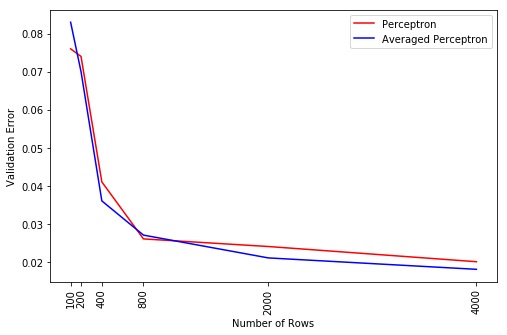

In [45]:
n_sample = [100, 200, 400, 800, 2000, 4000]
val_error = []
avg_val_error = []
for n in n_sample:
    # perceptron
    perceptron_result = perceptron_train(train_array[:n])
    val_error.append(perceptron_test(perceptron_result[0], val_array))
    # averaged perceptron
    avg_perceptron_result = averaged_perceptron_train(train_array[:n])
    avg_val_error.append(perceptron_test(avg_perceptron_result[0], val_array))

plt.figure(figsize=(8,5))
plt.plot(n_sample, val_error, c="red")
plt.plot(n_sample, avg_val_error, c = "blue")
plt.xlabel("Number of Rows")
plt.ylabel("Validation Error")
plt.xticks(ticks=n_sample,rotation=90)
plt.legend(labels=["Perceptron", "Averaged Perceptron"])
plt.show()

## Question 8

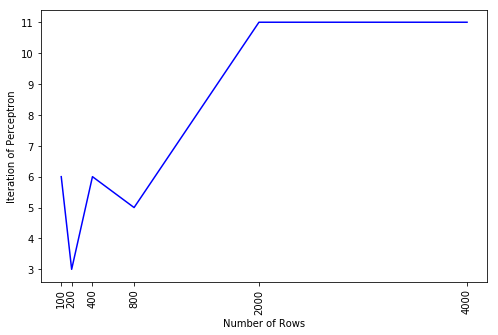

In [46]:
n_sample = [100, 200, 400, 800, 2000, 4000]
iter_freq = []
for n in n_sample:
    iter_freq.append(perceptron_train(train_array[:n])[2])

plt.figure(figsize=(8,5))
plt.plot(n_sample, iter_freq, c="blue")
plt.xlabel("Number of Rows")
plt.ylabel("Iteration of Perceptron")
plt.xticks(ticks=n_sample,rotation=90)
plt.show()

## Question 9, 10

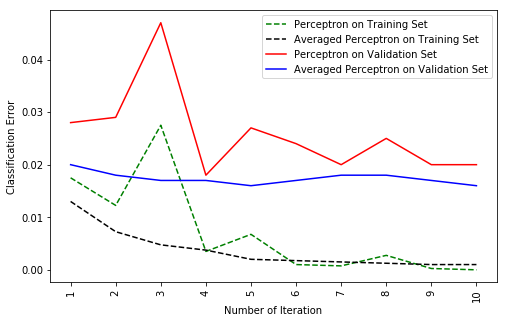

In [47]:
batch = range(1, 11)
train_val_error = []
avg_train_val_error = []
for i in batch:
    # perceptron
    perc_train_result = perceptron_train(train_array, max_iter=i)
    train_val_error.append((perceptron_test(perc_train_result[0], train_array),
                      perceptron_test(perc_train_result[0], val_array)))
    # averaged perceptron
    avg_perc_train_result = perceptron_train(train_array, max_iter=i, avg_func=True)
    avg_train_val_error.append((perceptron_test(avg_perc_train_result[0], train_array),
                          perceptron_test(avg_perc_train_result[0], val_array)))

plt.figure(figsize=(8,5))
plt.plot(batch, [train for train, val in train_val_error], c="green", ls="--")
plt.plot(batch, [train for train, val in avg_train_val_error], c="black", ls="--")                       
plt.plot(batch, [val for train, val in train_val_error], c="red")
plt.plot(batch, [val for train, val in avg_train_val_error], c="blue")
plt.xlabel("Number of Iteration")
plt.ylabel("Classification Error")
plt.xticks(ticks=batch,rotation=90)
plt.legend(labels=["Perceptron on Training Set", "Averaged Perceptron on Training Set",
                   "Perceptron on Validation Set", "Averaged Perceptron on Validation Set"])
plt.show()

In [53]:
print([val for train, val in avg_train_val_error])
print(np.argsort([val for train, val in avg_train_val_error])+1)

[0.020000000000000018, 0.018000000000000016, 0.017000000000000015, 0.017000000000000015, 0.016000000000000014, 0.017000000000000015, 0.018000000000000016, 0.018000000000000016, 0.017000000000000015, 0.016000000000000014]
[ 5 10  3  4  6  9  2  7  8  1]


Overall, the averaged perceptron model surpass the standard perceptron with lower validation error on each iteration. Especially, when I take the number of iteration as `5` or `10`, I can obtain the lowest validation error on the averaged perceptron.

## Question 11

In [54]:
# Reading in the test set
my_path = "/home/jovyan/shared/spam_test.txt"
sub_path = "spam_test.txt"
test_data = []
with open(sub_path, "r") as f:
    for line in f:
        test_data.append([line[0], line[2:].strip("\n").split()])
test_data = np.array(test_data)
# Preprocessing
test_features_vector = transformToFeatures(train_word_list, test_data)
y_test = np.array([[-1 if x==0 else 1 for x in test_data[:, 0].astype(int)]]) # 2D
test_array = np.concatenate((y_test.T, test_features_vector), axis=1)

In [55]:
# Train and Test
full_train_array = np.concatenate((train_array, val_array))
result_5 = perceptron_train(full_train_array, max_iter=5, avg_func=True)
result_10 = perceptron_train(full_train_array, max_iter=5, avg_func=True)
print("The testing error for 5 iteration is:", perceptron_test(result_5[0], test_array))
print("The testing error for 10 iteration is:", perceptron_test(result_10[0], test_array))

The testing error for 5 iteration is: 0.019000000000000017
The testing error for 10 iteration is: 0.019000000000000017
